Gates' full, raw (unedited) code
Reference: Professor Ami Gates, Dept. Applied Math, Data Science, University of Colorado

[Dr. Gates' Website](https://gatesboltonanalytics.com/?page_id=715)


In [1]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import layers

# Data

## Importing the data

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

11490434/11490434 [==============================] - 0s 0us/step


## Normalizing the data

In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

## Check data and shapes

In [4]:
print(X_train[4])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [5]:
print(y_train[4])

9


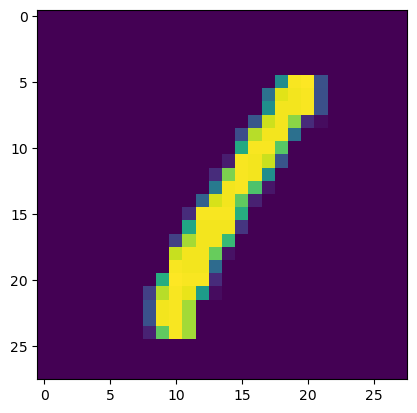

In [6]:
plt.imshow(X_train[3]) 

In [7]:
print(X_train.shape)
print(X_train.shape[1:])

(60000, 28, 28)
(28, 28)


In [8]:
print(y_train.shape)

(60000,)


In [9]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


# Build the model

In [10]:
model = tensorflow.keras.models.Sequential()

: 

## Adding the model layers

The number of units is the number of neurons connected to the layer holding the concatenated vector of hidden state and input

In [ ]:
model.add(tensorflow.keras.layers.LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
model.add(tensorflow.keras.layers.Dropout(0.2))
model.add(tensorflow.keras.layers.LSTM(128))
model.add(tensorflow.keras.layers.Dense(64, activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.2))
model.add(tensorflow.keras.layers.Dense(10, activation='softmax'))

## Compiling the model

In [ ]:
model.compile( loss='sparse_categorical_crossentropy', 
              optimizer = tensorflow.keras.optimizers.Adam(lr=0.001, decay=1e-6), metrics=['accuracy'] )

## Fitting data to the model

In [ ]:
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

# Evaluating the test loss and accuracy

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

## visualizing the change in the validation loss

In [ ]:
plt.plot(val_loss) 
plt.title("Test Loss",size=18)
plt.xlabel("Number of iterations") 
plt.ylabel("Test Loss") 
plt.show() 

## visualizing the change in the accuracy

In [ ]:
plt.plot(val_acc) 
plt.title("Test Accuracy",size=18)
plt.xlabel("Number of iterations") 
plt.ylabel("Test Accuracy") 
plt.show() 